In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.head()  # Display the first few rows of the DataFrame


,news_url,title,extracted_article_text,news_type,class
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   news_url                16044 non-null  object
 1   title                   16044 non-null  object
 2   extracted_article_text  16044 non-null  object
 3   news_type               16044 non-null  object
 4   class                   16044 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 626.8+ KB


news_url                  0
title                     0
extracted_article_text    0
news_type                 0
class                     0
dtype: int64

In [3]:
df['combined_text'] = df['title'] + " " + df['extracted_article_text']


In [4]:
df.duplicated().sum()  # Check for duplicates

928

In [6]:
df.columns

Index(['news_url', 'title', 'extracted_article_text', 'news_type', 'class',
       'combined_text'],
      dtype='object')

In [10]:
class DataCleaner:
    def __init__(self, df):
      self.df = df.copy()

    def remove_duplicates(self):
        # remove duplicates
        self.df.drop_duplicates(inplace=True)
    #def lowercase_columns(self):
        #self.df.columns = [col.lower().strip() for col in self.df.columns]
        #return self
    def clean_text(self):
        # removve mentons , urls,hashtag symbol,punctuation and digits
        self.df['combined_text'] = self.df['combined_text'].str.replace(r'@\w+', '', regex=True)# Remove mentions
        self.df['combined_text'] = self.df['combined_text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)  # Remove URLs
        self.df['combined_text'] = self.df['combined_text'].str.replace(r'#\w+', '', regex=True) # Remove hashtags
       # self.df['text'] = self.df['text'].str.replace(r'\d+', '', regex=True) # Remove digits
        self.df['combined_text'] = self.df['combined_text'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation  
        #lowercase the text   
        self.df['combined_text'] = self.df['combined_text'].str.lower()  # Convert to lowercase
        # Remove leading and trailing whitespace
        self.df['combined_text'] = self.df['combined_text'].str.strip()  # Remove leading and trailing whitespace
        # Remove extra spaces
        self.df['combined_text'] = self.df['combined_text'].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces
        # Remove empty strings
        self.df = self.df[self.df['combined_text'] != '']
        # Remove rows with empty text
        self.df = self.df[self.df['combined_text'].notna()]

    def get_cleaned_data(self):
        return self.df  
cleaner = DataCleaner(df)
#cleaner.fill_missing_values()
cleaner.remove_duplicates()
#cleaner.lowercase_columns()
# new column cleaned_text
df['cleaned_text']=cleaner.clean_text()
#cleaned_df = cleaner.get_cleaned_data()
df = cleaner.get_cleaned_data()


In [13]:
df.head()  # Display the first few rows of the cleaned DataFrame

,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com


In [12]:
from urllib.parse import urlparse

df['domain'] = df['news_url'].apply(lambda x: urlparse(x).netloc if isinstance(x, str) else '')


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Example if domain is useful
domain_encoded = OneHotEncoder().fit_transform(df[['domain']])


In [15]:
# tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df['tokenized_text'] = df['combined_text'].apply(word_tokenize)
# Check the first few rows after tokenization
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[will, the, royals, return, for, season, 5, th..."
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, for, divorce, from, ry..."
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, for, taylor, swifts, reputatio..."
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f..."
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, to, royal, bab..."


In [16]:
#stopwords removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stopwords])
# Check the first few rows after stopwords removal
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert..."
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,..."
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to..."
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f..."
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3..."


In [17]:
#lammatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# Check the first few rows after lemmatization
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text,lemmatized_text
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert...","[royal, return, season, 5, story, far, enterta..."
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,...","[naya, rivera, refiles, divorce, ryan, dorsey,..."
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to...","[outfit, idea, taylor, swift, reputation, tour..."
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f...","[scott, hutchison, dead, frightened, rabbit, f..."
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3...","[kate, middleton, give, birth, royal, baby, 3,..."


In [21]:
# •	Text length distribution
df['text_length']=df['combined_text'].apply(lambda x: len(x.split()))
# Check the first few rows after tweet length calculation
df.head()

,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text,lemmatized_text,text_length
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert...","[royal, return, season, 5, story, far, enterta...",703
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,...","[naya, rivera, refiles, divorce, ryan, dorsey,...",380
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to...","[outfit, idea, taylor, swift, reputation, tour...",1219
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f...","[scott, hutchison, dead, frightened, rabbit, f...",898
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3...","[kate, middleton, give, birth, royal, baby, 3,...",328


In [23]:
#join token
df['Document'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))
# Check the first few rows after joining tokens
df.head(10)

,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text,lemmatized_text,text_length,Document
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert...","[royal, return, season, 5, story, far, enterta...",703,royal return season 5 story far entertainment ...
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,...","[naya, rivera, refiles, divorce, ryan, dorsey,...",380,naya rivera refiles divorce ryan dorsey domest...
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to...","[outfit, idea, taylor, swift, reputation, tour...",1219,outfit idea taylor swift reputation tour unite...
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f...","[scott, hutchison, dead, frightened, rabbit, f...",898,scott hutchison dead frightened rabbit frontma...
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3...","[kate, middleton, give, birth, royal, baby, 3,...",328,kate middleton give birth royal baby 3 boy bab...
5,people.com/parents/khloe-kardashian-daughter-t...,Khloe Kardashian: True Has 'Baby Class Once a ...,"""It's so fun to see how they all interact and ...",gossip,0,khloe kardashian true has baby class once a we...,None,,"[khloe, kardashian, true, baby, class, week, c...","[khloe, kardashian, true, baby, class, week, c...",365,khloe kardashian true baby class week cousin f...
6,https://people.com/pets/lena-dunham-cat-gia-ma...,Lena Dunham Mourns the Death of Her Cat Gia Ma...,Lena Dunham's beloved cat Gia Marie died in he...,gossip,1,lena dunham mourns the death of her cat gia ma...,None,people.com,"[lena, dunham, mourns, death, cat, gia, marie,...","[lena, dunham, mourns, death, cat, gia, marie,...",514,lena dunham mourns death cat gia marie love de...
7,https://www.bbc.com/news/entertainment-arts-43...,Tim McGraw collapses on stage in Ireland,Country star Tim McGraw collapsed on stage dur...,gossip,1,tim mcgraw collapses on stage in ireland count...,None,www.bbc.com,"[tim, mcgraw, collapses, stage, ireland, count...","[tim, mcgraw, collapse, stage, ireland, countr...",465,tim mcgraw collapse stage ireland country star...
8,https://www.nbclosangeles.com/news/local/Star-...,Star Wars Fans Show Up for 'Solo' Red Carpet i...,Hollywood Boulevard was shutdown at Highland T...,gossip,1,star wars fans show up for solo red carpet in ...,None,www.nbclosangeles.com,"[star, wars, fans, show, solo, red, carpet, ho...","[star, war, fan, show, solo, red, carpet, holl...",214,star war fan show solo red carpet hollywood ho...
9,https://www.dailymail.co.uk/tvshowbiz/article-...,Jessica Simpson insists she's not pregnant on ...,By DAILYMAIL.COM REPORTER Published: 14:49 BST...,gossip,1,jessica simpson insists shes not pregnant on e...,None,www.dailymail.co.uk,"[jessica, simpson, insists, shes, pregnant, el...","[jessica, simpson, insists, shes, pregnant, el...",358,jessica simpson insists shes

In [26]:
#most frequent words
from collections import Counter
import matplotlib.pyplot as plt
# Count the frequency of each word in the lemmatized text
all_words = [word for sublist in df['lemmatized_text'] for word in sublist]
word_counts = Counter(all_words)    
most_common_words=word_counts.most_common(10)  # Display the 10 most common words
most_common_words

[('know', 38589),
 ('said', 37475),
 ('one', 34091),
 ('like', 33813),
 ('time', 33106),
 ('year', 31425),
 ('new', 30417),
 ('show', 28666),
 ('people', 26360),
 ('get', 26164)]

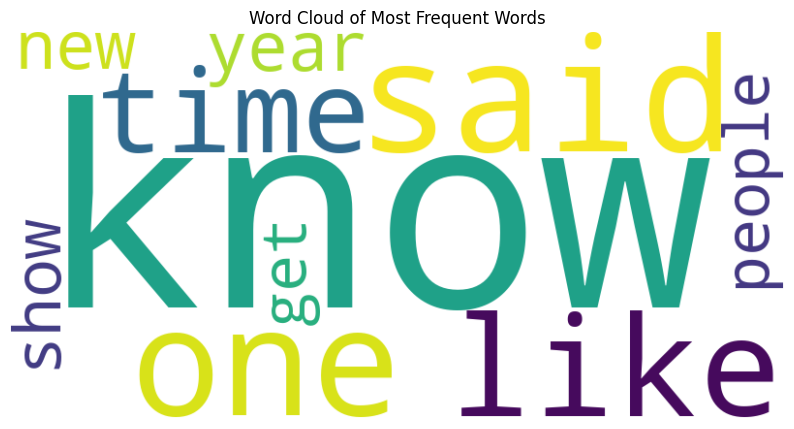

In [27]:
#•	WordClouds
from wordcloud import WordCloud
# Generate a word cloud from the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))   
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Or higher if needed
X_text = vectorizer.fit_transform(df['Document'])


In [37]:
df.head()  # Display the first few rows after TF-IDF vectorization

,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text,lemmatized_text,text_length,Document,num_named_entities
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert...","[royal, return, season, 5, story, far, enterta...",703,royal return season 5 story far entertainment ...,1
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,...","[naya, rivera, refiles, divorce, ryan, dorsey,...",380,naya rivera refiles divorce ryan dorsey domest...,2
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to...","[outfit, idea, taylor, swift, reputation, tour...",1219,outfit idea taylor swift reputation tour unite...,1
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f...","[scott, hutchison, dead, frightened, rabbit, f...",898,scott hutchison dead frightened rabbit frontma...,1
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3...","[kate, middleton, give, birth, royal, baby, 3,...",328,kate middleton give birth royal baby 3 boy bab...,2


In [34]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
import numpy as np

# One-hot encode domain
domain_ohe = OneHotEncoder(handle_unknown='ignore')
domain_encoded = domain_ohe.fit_transform(df[['domain']].fillna('missing'))

# Include length-based features
length_features = df[['text_length']].fillna(0).values

# Combine all
X_final = hstack([X_text, domain_encoded, length_features])


In [35]:
from sklearn.preprocessing import OneHotEncoder

domain_ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)
domain_encoded = domain_ohe.fit_transform(df[['domain']].fillna('missing'))


c:\Users\Administrator\miniconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: [-1.0, 1.0]

df['sentiment_score'] = df['title'].apply(get_sentiment)


In [39]:
def url_features(url):
    return {
        'has_gov': int('.gov' in url),
        'has_blog': int('blog' in url),
        'has_wp': int('wp' in url or 'wordpress' in url),
        'has_news': int('news' in url)
    }

url_feature_df = df['news_url'].fillna('').apply(url_features).apply(pd.Series)

# Add to main DataFrame
df = pd.concat([df, url_feature_df], axis=1)


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['Document'])


In [43]:
from sklearn.preprocessing import StandardScaler

numerical_features = df[['num_named_entities', 'sentiment_score', 'text_length',
                         'has_gov', 'has_blog', 'has_wp', 'has_news']].fillna(0)

# Scale numerical features
scaler = StandardScaler()
X_num = scaler.fit_transform(numerical_features)


In [44]:
from scipy.sparse import csr_matrix

X_final = hstack([
    X_text,                      # TF-IDF
    domain_encoded,              # One-hot encoded domains
    csr_matrix(X_num)            # Numerical features
])


In [31]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Count number of named entities in full text
def count_entities(text):
    doc = nlp(text)
    return len(doc.ents)

df['num_named_entities'] = df['title'].apply(count_entities)
# Check the first few rows after counting named entities
df.head()

,news_url,title,extracted_article_text,news_type,class,combined_text,cleaned_text,domain,tokenized_text,lemmatized_text,text_length,Document,num_named_entities
0,https://www.bustle.com/p/will-the-royals-retur...,Will 'The Royals' Return For Season 5? This St...,Entertainment With a royal wedding and a coup ...,gossip,1,will the royals return for season 5 this story...,None,www.bustle.com,"[royals, return, season, 5, story, far, entert...","[royal, return, season, 5, story, far, enterta...",703,royal return season 5 story far entertainment ...,1
1,https://www.foxnews.com/entertainment/naya-riv...,Naya Rivera refiles for divorce from Ryan Dors...,"This material may not be published, broadcast,...",gossip,1,naya rivera refiles for divorce from ryan dors...,None,www.foxnews.com,"[naya, rivera, refiles, divorce, ryan, dorsey,...","[naya, rivera, refiles, divorce, ryan, dorsey,...",380,naya rivera refiles divorce ryan dorsey domest...,2
2,https://www.unitedbypop.com/style/fashion/tayl...,Outfit ideas for Taylor Swift's Reputation Tour,United By Pop - United Kingdom. United States....,gossip,1,outfit ideas for taylor swifts reputation tour...,None,www.unitedbypop.com,"[outfit, ideas, taylor, swifts, reputation, to...","[outfit, idea, taylor, swift, reputation, tour...",1219,outfit idea taylor swift reputation tour unite...,1
3,https://variety.com/2018/music/news/scott-hutc...,Scott Hutchison Dead: Frightened Rabbit Frontm...,By Robert Mitchell A body found Thursday night...,gossip,1,scott hutchison dead frightened rabbit frontma...,None,variety.com,"[scott, hutchison, dead, frightened, rabbit, f...","[scott, hutchison, dead, frightened, rabbit, f...",898,scott hutchison dead frightened rabbit frontma...,1
4,https://www.etonline.com/kate-middleton-gives-...,Kate Middleton Gives Birth to Royal Baby No. 3...,Baby No. 3 is officially here! Kate Middleton ...,gossip,1,kate middleton gives birth to royal baby no 3 ...,None,www.etonline.com,"[kate, middleton, gives, birth, royal, baby, 3...","[kate, middleton, give, birth, royal, baby, 3,...",328,kate middleton give birth royal baby 3 boy bab...,2


Accuracy: 0.9901
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       719
           1       0.99      1.00      0.99      2305

    accuracy                           0.99      3024
   macro avg       0.99      0.98      0.99      3024
weighted avg       0.99      0.99      0.99      3024



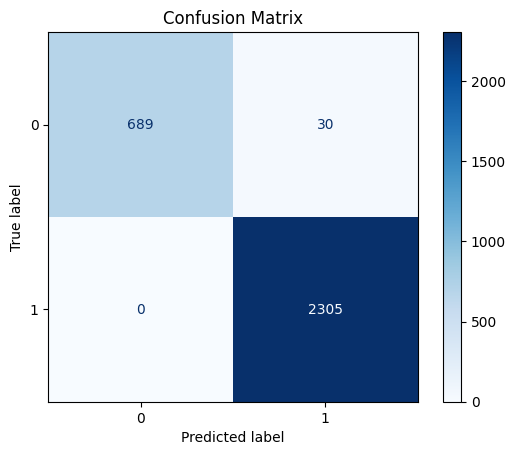

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
y = df['class'].values
X= X_final
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)    
plt.title('Confusion Matrix')
plt.show()



c:\Users\Administrator\miniconda3\envs\newenv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:35:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9921
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       719
           1       0.99      1.00      0.99      2305

    accuracy                           0.99      3024
   macro avg       0.99      0.98      0.99      3024
weighted avg       0.99      0.99      0.99      3024



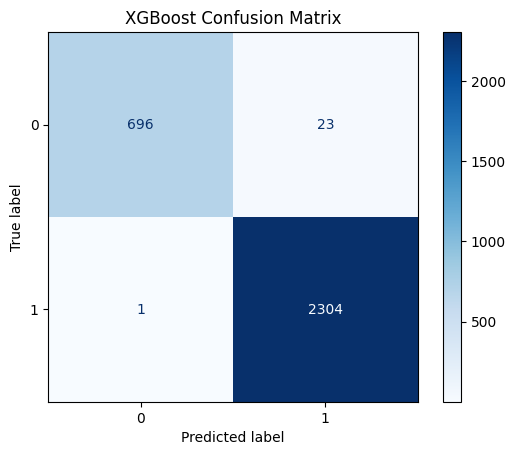

In [47]:
# xgboost model
import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
# Display confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show()

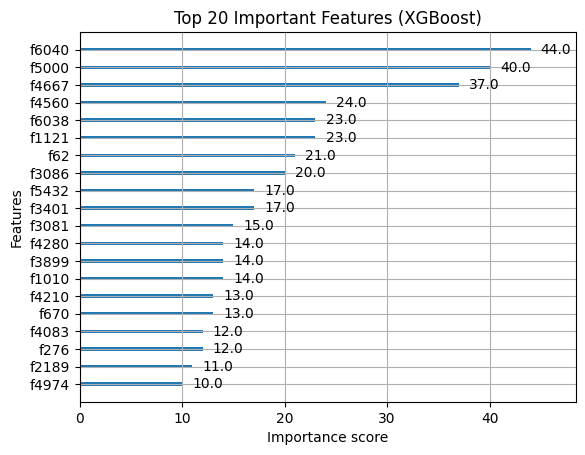

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the top 20 important features
plot_importance(xgb_model, max_num_features=20)
plt.title("Top 20 Important Features (XGBoost)")
plt.show()


In [ ]:
tfidf_feature_names = vectorizer.get_feature_names_out()
all_feature_names = list(tfidf_feature_names) + ['url_length', 'num_dots', 'has_https', 'js_count', 'domain_age']  # example
xgb_model.feature_names = all_feature_names


In [ ]:
plot_importance(xgb_model, max_num_features=20)
plt.title("Top 20 Important Features (XGBoost)")
plt.show()


In [ ]:
# lstm model
import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_text.shape[1]))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the LSTM model
lstm_model.fit(X_train.toarray(), y_train, epochs=5, batch_size=32, validation_data=(X_test.toarray(), y_test))
# Make predictions with the LSTM model
y_pred_lstm = (lstm_model.predict(X_test.toarray()) > 0.5).astype("int32")
# Evaluate the LSTM model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"LSTM Accuracy: {accuracy_lstm:.4f}")
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
# Display confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=['Fake', 'Real'])
disp_lstm.plot(cmap=plt.cm.Blues)
plt.title('LSTM Confusion Matrix')
plt.show()

c:\Users\Administrator\miniconda3\envs\newenv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
 39/378 ━━━━━━━━━━━━━━━━━━━━ 2:10:58 23s/step - accuracy: 0.7017 - loss: 0.5844